<a href="https://colab.research.google.com/github/alehfernandez/Data-Science-I/blob/main/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Data Science: RED WHINE**

**ABSTRACT:**

En este proyecto, vamos a analizar un data set sobre vinos tintos. Queremos entender qué hace que un vino sea bueno y si podemos predecir qué tan bueno será un vino basándonos en sus características. El conjunto de datos contiene información sobre cosas como la acidez, el azúcar, el alcohol y otras cosas que pueden afectar el sabor del vino. También tenemos una puntuación de calidad para cada vino, que va de 3 (no tan bueno) a 8 (muy bueno).

Al mirar los datos, vemos que la mayoría de los vinos tienen una calidad de 5 o 6. No hay muchos vinos realmente malos (3) ni realmente buenos (8). Esto nos dice que la calidad del vino depende de muchas cosas, no solo de una.

Para hacer este proyecto, vamos a seguir varios pasos. Primero, vamos a explorar los datos para ver cómo se relacionan las diferentes características con la calidad del vino. Usaremos gráficos para encontrar patrones interesantes.

Luego, vamos a usar técnicas de aprendizaje automático para crear modelos que puedan predecir la calidad del vino. Probaremos diferentes modelos para ver cuál funciona mejor.

Al final, veremos qué tan bien funcionan nuestros modelos y qué características son las más importantes para predecir la calidad del vino.

Esperamos que este proyecto nos ayude a entender mejor qué hace que un vino sea bueno. Esto podría ser útil para los productores de vino para que puedan hacer mejores vinos, y también para las personas que compran vino para que puedan elegir los mejores.

Este proyecto es solo el comienzo. En el futuro, podríamos analizar más cosas, como el tipo de uva, de dónde viene el vino y cómo se envejece, para hacer modelos aún mejores.


**HIPÓTESIS:**

1. La acidez fija tiene una relación negativa con la calidad del vino, a mayor acidez fija, menor calidad.
2. El contenido de alcohol tiene una relación positiva con la calidad del vino, a mayor contenido de alcohol, mayor calidad.
3. Es posible construir un modelo predictivo que estime la calidad del vino con una precisión razonable utilizando las características fisicoquímicas disponibles.

In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
url='https://raw.githubusercontent.com/alehfernandez/Data-Science-I/main/winequality-red.csv'
df = pd.read_csv(url)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df.head(11)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Variables potencialmente interesante

In [14]:
# renombramos las columnas del ingles al español
df= df.rename(columns={"fixed acidity": "Acidez Fija", "volatile acidity": "Acidez Volatil", "citric acid": "Ácido cítrico",
                       "residual sugar": "Azúcar residual", "chlorides":"Cloruros", "free sulfur dioxide":"Dióxido de azufre libre",
                       "total sulfur dioxide":"Dióxido de azufre total", "density":"Densidad", "sulphates":"Sulfatos",
                       "alcohol":"Alcohol", "quality":"Calidad"})
df.head()

,Acidez Fija,Acidez Volatil,Ácido cítrico,Azúcar residual,Cloruros,Dióxido de azufre libre,Dióxido de azufre total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


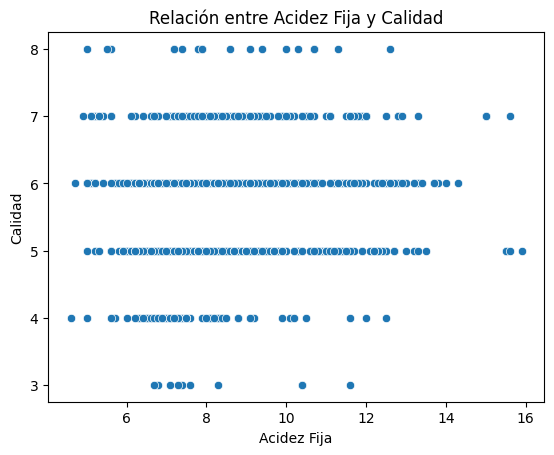

In [15]:
# 1er hipótesis: "La acidez fija tiene una relación negativa con la calidad del vino, a mayor acidez fija, menor calidad."
# Para analizar la misma utilizaremos el diagrama de dispersión entre estas dos variables.
# De esta manera poder determinar si existe una tendencia a que la calidad disminuya a medida que aumenta la acidez fija.

sns.scatterplot(data=df, x='Acidez Fija', y='Calidad')
plt.title('Relación entre Acidez Fija y Calidad')
plt.show()

# basándonos en el gráfico de dispersión rechazamos la hipótesis de que la acidez fija tiene una relación negativa con la calidad del vino.
# A su vez, se podría indicar que la Aacidez fija no es determinante en la calidad del vino tinto, por lo cual podriamos confirmar que no hay una relación
# determinante en la cantidad de acidez fija para determinar la calidad del vino.


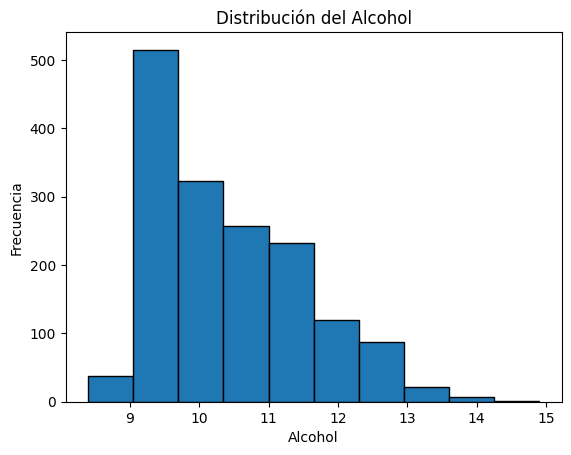

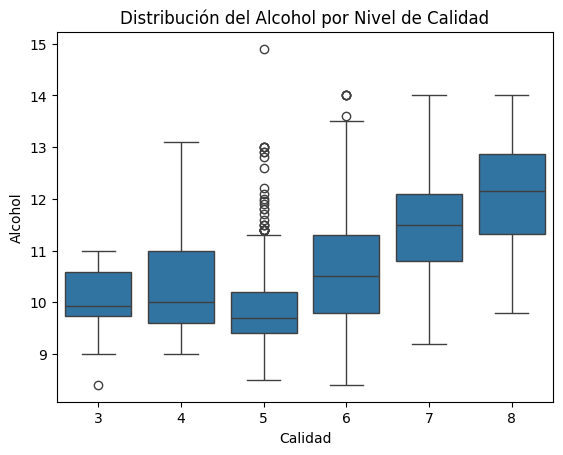

In [16]:
# 2da hipótesis: "El contenido de alcohol tiene una relación positiva con la calidad del vino, a mayor contenido de alcohol, mayor calidad."
# Para este análisis utilizaremos un histograma para observar la distribución de los valores de contenido de alcohol en la base de datos
# y un gráfico boxplot para visualizar la relación entre el contenido de alcohol y la calidad del vino.

import matplotlib.pyplot as plt

plt.hist(df['Alcohol'], bins=10, edgecolor='black')
plt.title('Distribución del Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.show()

sns.boxplot(x='Calidad', y='Alcohol', data=df)
plt.title('Distribución del Alcohol por Nivel de Calidad')
plt.show()

# Se puede observar que la mayoría de los vinos tienen un contenido de alcohol entre 9 y 12 grados, siendo el rango más común entre 9.5 y 10.5 grados.
# Hay pocos vinos con muy bajo contenido de alcohol (menos de 9 grados) y pocos con muy alto contenido (más de 13 grados).
# Los vinos de mayor calidad (6, 7 y 8) tienden a tener un contenido de alcohol un poco más alto que los vinos de menor calidad (3, 4 y 5).
# A medida que aumenta la calidad del vino se observa un aumento en el contenido de alcohol, por lo cual podriamos indicar que la hipotesis esta confirmada,
# aunque tambien se ve una presencia bastante distribuida en el resto de niveles de calidad, lo que indica que el contenido de alcohol no es el único factor determinante de la calidad.

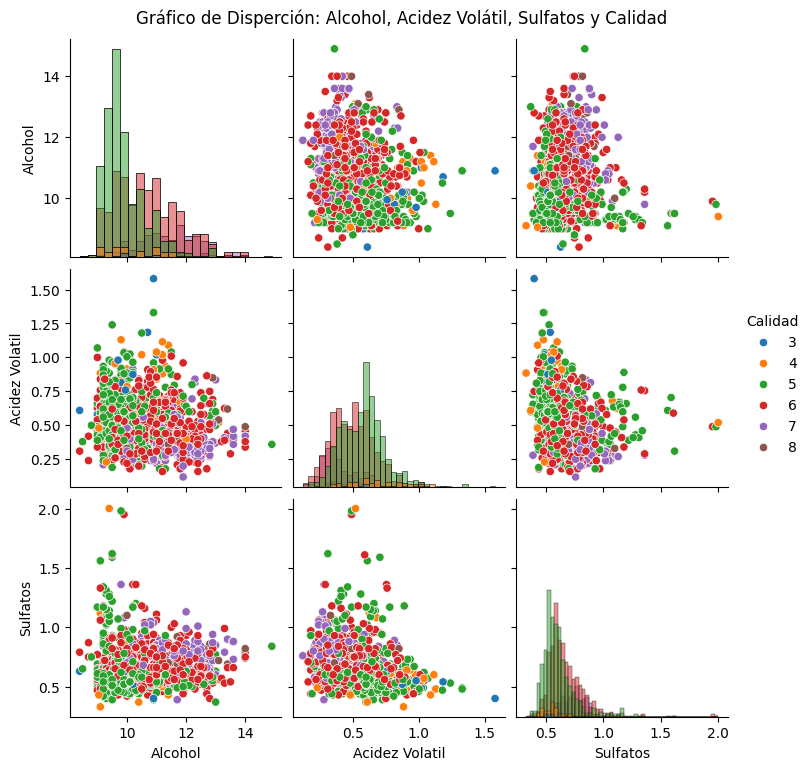

In [21]:
# 3er Hipotesis: "La relación entre el contenido de alcohol y la calidad del vino se ve afectada por el nivel de acidez volátil y el contenido de sulfatos"
# Vamos a crear un gráfico de dispersión 3D, donde cada eje represente una de las variables (alcohol, acidez volátil y sulfatos)
# y el color o tamaño de los puntos indique la calidad del vino.

columns_of_interest = ['Alcohol', 'Acidez Volatil', 'Sulfatos', 'Calidad']
df_filtered = df[columns_of_interest]
sns.pairplot(df_filtered, hue='Calidad', diag_kind='hist', kind='scatter', palette='tab10')
plt.suptitle('Gráfico de Disperción: Alcohol, Acidez Volátil, Sulfatos y Calidad', y=1.02)
plt.show()

# Podemos analizar algunos puntos a tener en cuenta segun las graficas:
# Alcohol vs. Calidad: tendencia positiva general entre alcohol y calidad, pero esta tendencia parece ser más fuerte para vinos con menor acidez volátil.
#                      Esto sugiere que la acidez volátil podría estar moderando la relación entre alcohol y calidad.
# Alcohol vs. Acidez Volátil: relación negativa entre alcohol y acidez volátil, especialmente para vinos de mayor calidad.
#                             Esto indica que los vinos de alta calidad tienden a tener un alto contenido de alcohol y una baja acidez volátil.
# Alcohol vs. Sulfatos: No se observa una relación clara entre alcohol y sulfatos, estas variables podrían ser independientes en relación a la calidad.
# Acidez Volátil vs. Sulfatos: ligera tendencia negativa, lo que sugiere que los vinos con mayor acidez volátil tienden a tener menor contenido de sulfatos.
# En base a los comentado anteriormente, la hipótesis de que la relación entre el contenido de alcohol y la calidad del vino se ve afectada por el nivel de acidez volátil se puede confirmar,
# Los vinos con mayor contenido de alcohol y menor acidez volátil tienden a tener una calidad superior.
# Sin embargo, la influencia de los sulfatos en esta relación no es tan clara para ser determinante.

In [23]:
# No tenemos valores perdidos, los identificamos de la siguiente manera:

missing_values = df.isnull().sum()
print("Valores perdidos en cada columna:")
print(missing_values)


Valores perdidos en cada columna:
Acidez Fija                0
Acidez Volatil             0
Ácido cítrico              0
Azúcar residual            0
Cloruros                   0
Dióxido de azufre libre    0
Dióxido de azufre total    0
Densidad                   0
pH                         0
Sulfatos                   0
Alcohol                    0
Calidad                    0
dtype: int64
